# Stock Price Prediction
#### Auto-ARIMA (ARIMAX) model with exogenous features for stock price forecasting

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Data/BAJFINANCE.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [4]:
## setting df index to date
df.set_index('Date', inplace=True)

## Data Preprocessing

### Checking for Null Values

In [5]:
## checking for null values
df.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [6]:
## checking for null data in Trades
df[df['Trades'].isnull()]

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.50,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.90,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.60,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.10,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.00,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-05-25,BAJFINANCE,EQ,601.20,593.00,619.00,590.00,597.00,595.05,598.98,5391,3.229096e+11,NaN,4100.0,0.7605
2011-05-26,BAJFINANCE,EQ,595.05,593.00,607.40,588.20,597.90,595.40,594.93,3341,1.987653e+11,NaN,2004.0,0.5998
2011-05-27,BAJFINANCE,EQ,595.40,585.00,667.00,585.00,620.00,630.75,627.19,11270,7.068407e+11,NaN,6614.0,0.5869


There's a lot of missing data, almost around 11 years of data. So, we drop the feature.

### Dropping Trades Feature & Some Null Values

In [7]:
## dropping the Trades features
df.drop(['Trades'], axis=1, inplace=True)

In [8]:
## dropping missing values Deliverable Volume and %Deliverable
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Deliverable Volume    0
%Deliverble           0
dtype: int64

### Checking for Duplicate Values

In [10]:
## checking if we have duplicate values
df.duplicated().sum()

np.int64(0)

## Data Analysis

### Explanatory Analysis

In [11]:
## descriptive statistics
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
count,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4.624000e+03,4.624000e+03,4.624000e+03,4624.000000
mean,1434.467669,1435.420372,1459.435272,1410.286494,1435.364598,1435.227217,1435.540487,5.546513e+05,1.419380e+14,1.419690e+05,0.643712
std,1819.285859,1819.150646,1846.090033,1790.465393,1819.624240,1819.412350,1819.002555,1.876521e+06,5.120671e+14,3.495895e+05,0.233522
min,33.550000,33.600000,34.000000,33.000000,34.000000,34.000000,33.840000,6.000000e+00,2.790000e+07,6.000000e+00,0.057500
25%,221.850000,221.000000,230.750000,216.475000,221.050000,222.375000,223.417500,6.415500e+03,1.310379e+11,4.745750e+03,0.478650
50%,648.500000,648.700000,662.950000,635.975000,647.725000,648.725000,649.970000,1.926450e+04,1.223848e+12,1.381950e+04,0.681950
75%,1905.612500,1910.500000,1933.562500,1881.500000,1907.887500,1907.287500,1909.500000,1.124375e+05,3.743263e+13,6.951800e+04,0.832850
max,11393.300000,11300.000000,11770.000000,11294.000000,11386.700000,11393.300000,11490.730000,2.596010e+07,8.787972e+15,3.690656e+06,1.000000


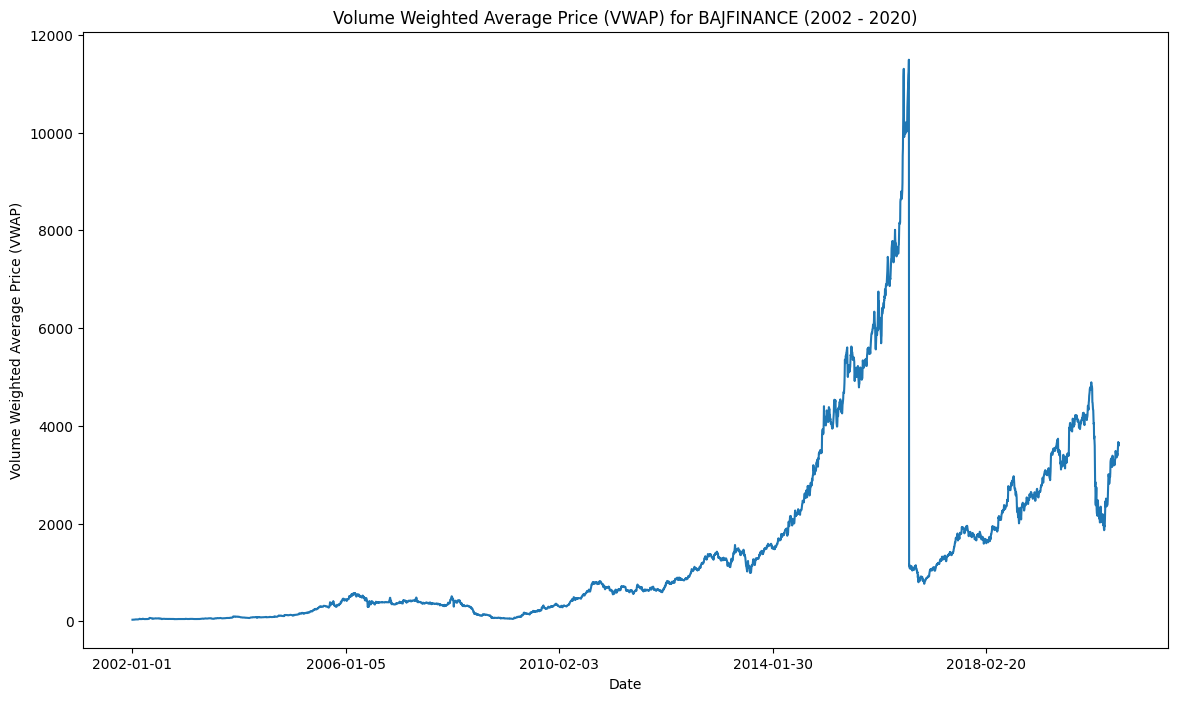

In [12]:
## plotting Volume Weighted Average Price (VWAP) to look at trend
df['VWAP'].plot(figsize=(14,8))
plt.title('Volume Weighted Average Price (VWAP) for BAJFINANCE (2002 - 2020)')
plt.xlabel('Date')
plt.ylabel('Volume Weighted Average Price (VWAP)')
plt.show()

We can observe a trend. 
Drop in 2008, likely due to global financial crisis?
High rise from 2014 to around 2016.
Huge Drop late 2017, interest rate rise?
Drop in 2020, Covid-19?

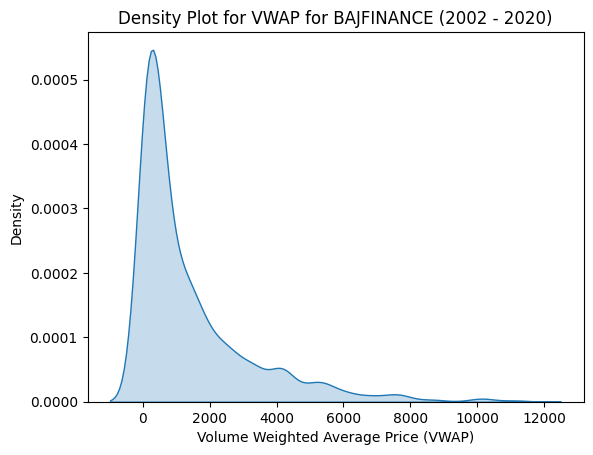

In [13]:
sns.kdeplot(data=df, x='VWAP', fill=True)
plt.title('Density Plot for VWAP for BAJFINANCE (2002 - 2020)')
plt.xlabel('Volume Weighted Average Price (VWAP)')
plt.ylabel('Density')
plt.show()

### Determining whether VWAP follows a Normal Distribution

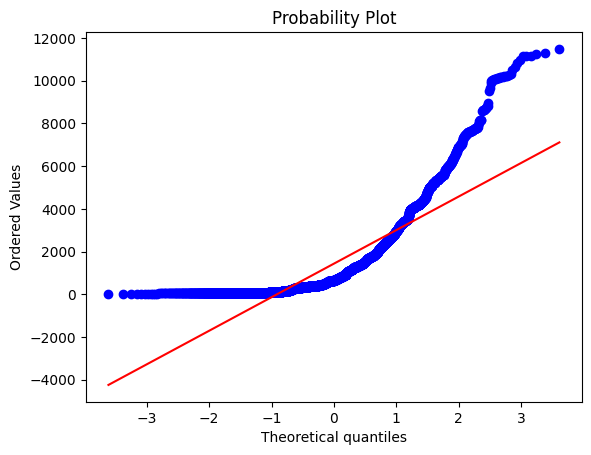

In [14]:
## QQ Plot
from scipy import stats
stats.probplot(x=df['VWAP'], plot=plt)
plt.show()

Hence, VWAP isn't normally distributed since the data points are close to the red line.

### Analyzing Other Features

In [15]:
cols = ['Open', 'High', 'Low', 'Close']

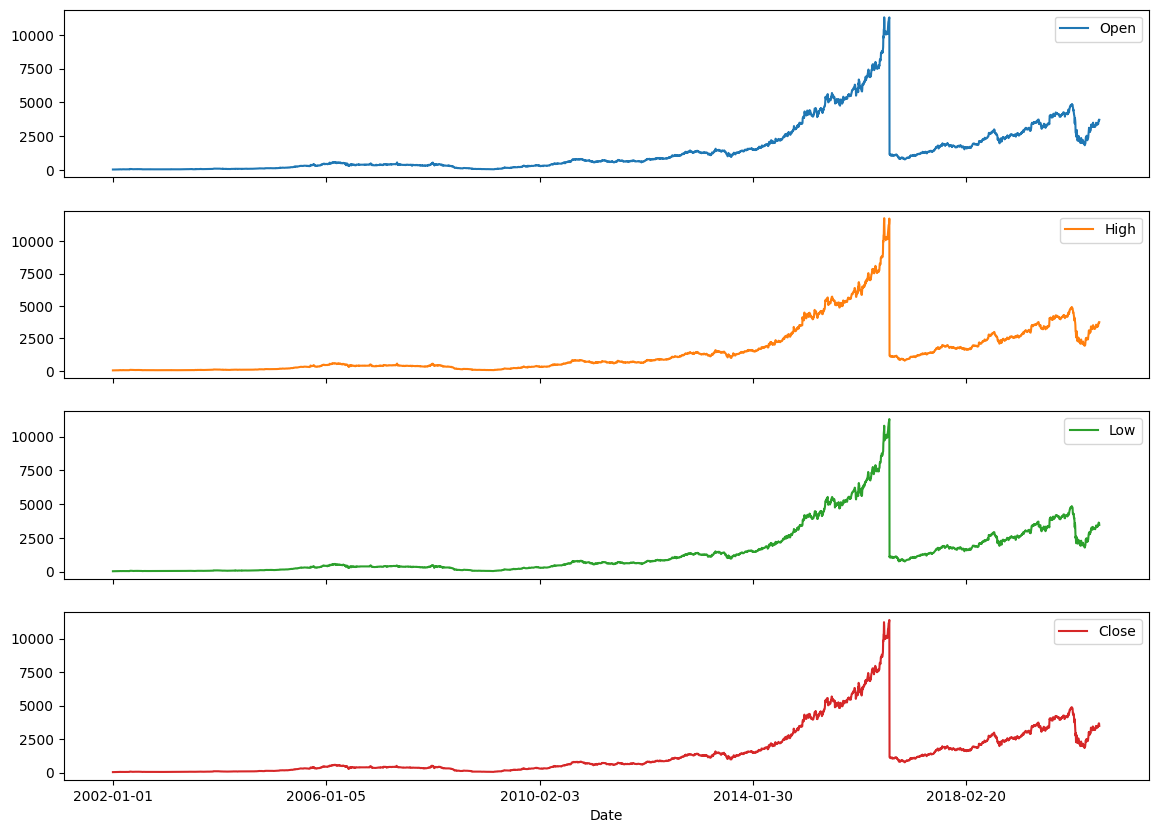

In [16]:
## plotting Open, High, Low, and Close
df[cols].plot(figsize=(14, 10), subplots=True)
plt.show()

### Candle-Stick Plot

In [17]:
import plotly.graph_objects as go

In [18]:
## candle stick/ohlc plot for trading for the first 50 data points
fig = go.Figure(data=[go.Candlestick(x=df.index[0:50],
                               open=df['Open'][0:50],
                               high=df['High'][0:50],
                               low=df['Low'][0:50],
                               close=df['Close'][0:50])])

fig.update_layout(
    title="BAJFINANCE Candlestick Chart (First 50 Days)",
    xaxis_title="Date",
    yaxis_title="Price",
    xaxis_rangeslider_visible=False,
    template="plotly_dark"
)

fig.show()

## Feature Engineering

### Creating lag features and rolling statistics

In [19]:
df.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [20]:
## selecting 4 key features for lag features im considering and a window period of 3 days and 7 days

## high and low represent daily price range
## volume indicates market activity
## turnover indicates value traded
lag_features = ['High', 'Low', 'Volume', 'Turnover']
win1 = 3        ## short term trend
win2 = 7        ## weekly trend

In [21]:
## rolling mean calculation
for feature in lag_features:
    df[feature+" rolling_mean_win(3)"] = df[feature].rolling(window=win1).mean()
    df[feature+" rolling_mean_win(7)"] = df[feature].rolling(window=win2).mean()

In [22]:
## rolling std calculation
for feature in lag_features:
    df[feature+" rolling_std_win(3)"] = df[feature].rolling(window=win1).std()
    df[feature+" rolling_std_win(7)"] = df[feature].rolling(window=win2).std()

In [23]:
df.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Deliverable Volume',
       '%Deliverble', 'High rolling_mean_win(3)', 'High rolling_mean_win(7)',
       'Low rolling_mean_win(3)', 'Low rolling_mean_win(7)',
       'Volume rolling_mean_win(3)', 'Volume rolling_mean_win(7)',
       'Turnover rolling_mean_win(3)', 'Turnover rolling_mean_win(7)',
       'High rolling_std_win(3)', 'High rolling_std_win(7)',
       'Low rolling_std_win(3)', 'Low rolling_std_win(7)',
       'Volume rolling_std_win(3)', 'Volume rolling_std_win(7)',
       'Turnover rolling_std_win(3)', 'Turnover rolling_std_win(7)'],
      dtype='object')

## Creating the Model (Auto-ARIMA)

### Dropping Null Values Obtained from Creating Lag Features

In [24]:
## dropping NaN because auto_arima will use linear regression first and linear regression can't handle NaN values
df.dropna(inplace=True)

### Splitting into training test set

In [25]:
## knowing the shape of the dataframe to split it 75/25
df.shape

(4618, 29)

In [26]:
training_data = df[0:3470]
test_data = df[3470:]

In [27]:
## initializing the dependent (target) and independent features
target = 'VWAP'
features = ['High rolling_mean_win(3)', 'High rolling_mean_win(7)',
       'Low rolling_mean_win(3)', 'Low rolling_mean_win(7)',
       'Volume rolling_mean_win(3)', 'Volume rolling_mean_win(7)',
       'Turnover rolling_mean_win(3)', 'Turnover rolling_mean_win(7)',
       'High rolling_std_win(3)', 'High rolling_std_win(7)',
       'Low rolling_std_win(3)', 'Low rolling_std_win(7)',
       'Volume rolling_std_win(3)', 'Volume rolling_std_win(7)',
       'Turnover rolling_std_win(3)', 'Turnover rolling_std_win(7)']

### Using pmdarima package

In [28]:
from pmdarima import auto_arima

In [29]:
model = auto_arima(y=training_data[target], X=training_data[features], trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=29491.699, Time=1.35 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=30850.340, Time=0.82 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=30045.446, Time=0.86 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=29675.995, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=55666.788, Time=0.76 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=29678.186, Time=1.26 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=29500.637, Time=1.11 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=31172.480, Time=1.37 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=29480.642, Time=1.32 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=29480.977, Time=1.22 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=29483.353, Time=1.35 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=29526.798, Time=1.71 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=29479.051, Time=1.65 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=29488.868, Time=1.55 sec
 ARIMA(1,0,5)(0,0,0

In [35]:
test_data = test_data.copy()

In [36]:
## predicting
predictions = model.predict(n_periods=len(test_data), X=test_data[features])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [37]:
print(predictions)

3470    6198.053483
3471    6277.383227
3472    6280.912198
3473    6259.909508
3474    6196.634980
           ...     
4613    4107.842607
4614    4361.644291
4615    4363.590067
4616    4611.175893
4617    4655.817438
Length: 1148, dtype: float64


In [38]:
test_data['Forecast'] = predictions.values

In [40]:
test_data['Forecast']

Date
2016-01-08    6198.053483
2016-01-11    6277.383227
2016-01-12    6280.912198
2016-01-13    6259.909508
2016-01-14    6196.634980
                 ...     
2020-08-25    4107.842607
2020-08-26    4361.644291
2020-08-27    4363.590067
2020-08-28    4611.175893
2020-08-31    4655.817438
Name: Forecast, Length: 1148, dtype: float64

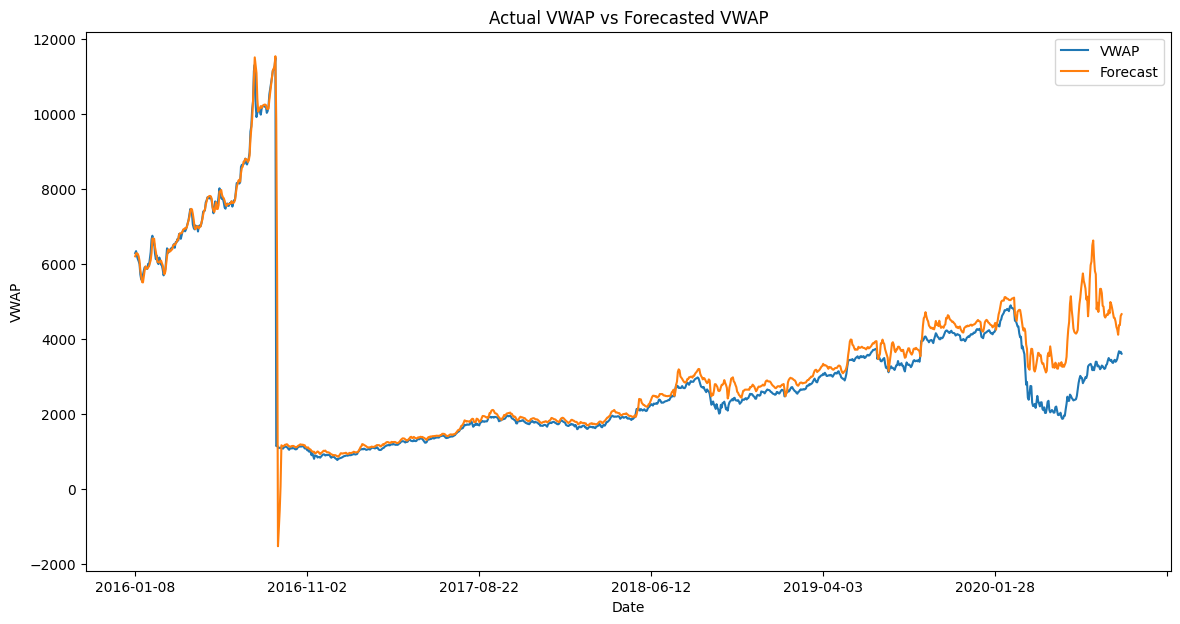

In [43]:
## plotting the actual VWAP and predicted VWAP
test_data[['VWAP', 'Forecast']].plot(figsize=(14,7))
plt.xlabel('Date')
plt.ylabel('VWAP')
plt.title('Actual VWAP vs Forecasted VWAP')
plt.show()

**Hence, the model seems to do a good job in predicting stock prices.**

## Baseline Model (Naive) for Comparison again ARIMAX

In [55]:
# creating naive forecast
test_data = test_data.copy()
test_data['Naive'] = test_data[target].shift(1)

In [56]:
test_data.head(2)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,High rolling_std_win(3),High rolling_std_win(7),Low rolling_std_win(3),Low rolling_std_win(7),Volume rolling_std_win(3),Volume rolling_std_win(7),Turnover rolling_std_win(3),Turnover rolling_std_win(7),Forecast,Naive
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-08,BAJFINANCE,EQ,6106.3,6136.0,6365.2,6092.6,6310.0,6314.5,6284.76,103507,...,104.185044,105.552927,70.965907,47.927479,34857.845850,26211.090045,2.217263e+13,1.665126e+13,6198.053483,NaN
2016-01-11,BAJFINANCE,EQ,6314.5,6311.9,6389.0,6221.0,6315.8,6306.2,6336.40,53240,...,108.733114,122.686113,97.283914,91.938315,25133.638462,26234.624780,1.568391e+13,1.664562e+13,6277.383227,6284.76


In [57]:
# dropping the first NA value
test_data = test_data.dropna()

In [58]:
test_data.head(2)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,High rolling_std_win(3),High rolling_std_win(7),Low rolling_std_win(3),Low rolling_std_win(7),Volume rolling_std_win(3),Volume rolling_std_win(7),Turnover rolling_std_win(3),Turnover rolling_std_win(7),Forecast,Naive
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-11,BAJFINANCE,EQ,6314.5,6311.9,6389.0,6221.0,6315.8,6306.2,6336.40,53240,...,108.733114,122.686113,97.283914,91.938315,25133.638462,26234.624780,1.568391e+13,1.664562e+13,6277.383227,6284.76
2016-01-12,BAJFINANCE,EQ,6306.2,6310.0,6329.0,6152.0,6229.0,6208.8,6207.06,58452,...,30.212801,123.552158,64.259785,98.980452,27640.216045,23695.741331,1.739222e+13,1.506982e+13,6280.912198,6336.40


## Accuracy Metrics (ARIMAX vs Baseline Naive)

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [60]:
# ARIMAX mae & rmse
arima_mae = mean_absolute_error(test_data['VWAP'], test_data['Forecast'])
arima_rmse = np.sqrt(mean_squared_error(test_data['VWAP'], test_data['Forecast']))

# Naive mae & rmse
naive_mae = mean_absolute_error(test_data['VWAP'], test_data['Naive'])
naive_rmse = np.sqrt(mean_squared_error(test_data['VWAP'], test_data['Naive']))

print("ARIMAX MAE:", arima_mae)
print("Naive MAE:", naive_mae)
print("ARIMAX RMSE:", arima_rmse)
print("Naive RMSE:", naive_rmse)

ARIMAX MAE: 313.9031706383909
Naive MAE: 56.2524237140366
ARIMAX RMSE: 637.4316230211285
Naive RMSE: 317.1588272090731


## Visual Representation of Actual, ARIMAX, and Baseline Naive

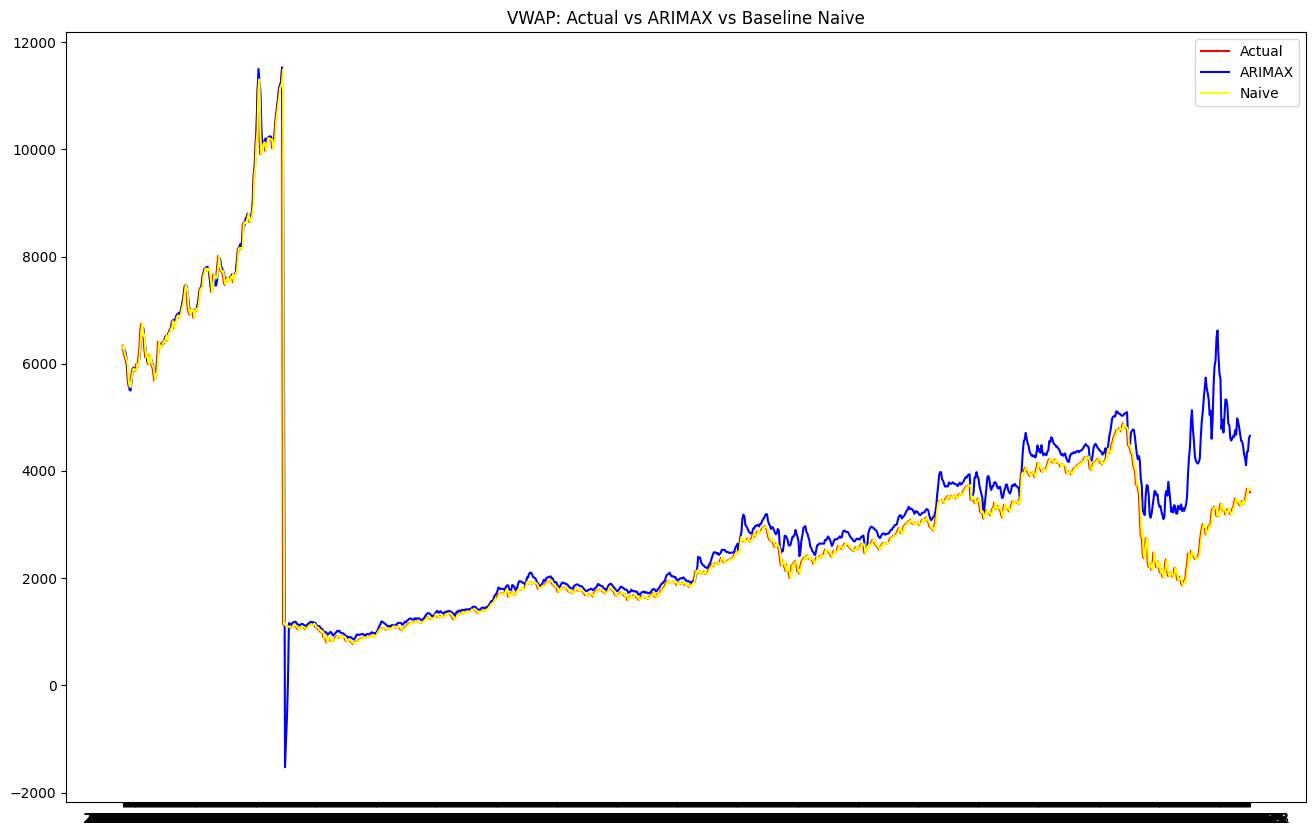

In [66]:
plt.figure(figsize=(16,10))
plt.plot(test_data.index, test_data['VWAP'], label='Actual', color='Red')
plt.plot(test_data.index, test_data['Forecast'], label='ARIMAX', color='Blue')
plt.plot(test_data.index, test_data['Naive'], label='Naive', color='Yellow')
plt.legend()
plt.title("VWAP: Actual vs ARIMAX vs Baseline Naive")
plt.show()

## Conclusion

As from the plot, it is obvious that Naive performs better. Naive tracks price tightly but ARIMAX lags and overshoots. 

There's also a huge difference their accuracy; naive being significantly better.

Reason? Stock prices (and VWAP) behave like a random walk, meaning:

$$
P_t = P_t-1 + e_t
$$